In [1]:
from helpers import * 

from four_complete import *
from four_complete_locations import *
from graph_checks import *

from canonical_order import *

from canonical_order_kant import *
from crossing_min import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = side_data

In [3]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

b = BoundaryCycle(copy.deepcopy(graph_data))
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()

ic| o: 1, direction: <CardinalDirections.SOUTH: 0>, ix: 10
ic| o: 2, direction: <CardinalDirections.WEST: 1>, ix: 11
ic| o: 3, direction: <CardinalDirections.NORTH: 2>, ix: 12
ic| o: 0, direction: <CardinalDirections.EAST: 3>, ix: 9


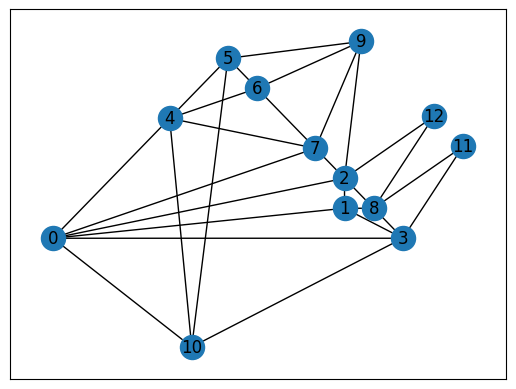

In [4]:
plot_planar(locs.G, locs.embed)

In [5]:
x, y = points_to_plot(b.boundary_line_string.convex_hull.boundary.coords)
quick_plotly_plot(x,y);

In [6]:
cm = CrossingMin(locs.data, b.boundary_line_string)
cm.run()
# cm.find_extrema_near_crossinge_edge()
# curr_line = cm.crossing_lines[0]

ic| radians: 0.7784321047608589
ic| math.degrees(radians): 44.60087424028277
ic| math.degrees(radians): 44.60087424028277
ic| radians: -0.6720639745373865
ic| math.degrees(radians): -38.50642930377987
ic| math.degrees(radians): 321.49357069622016


In [8]:
x, y = points_to_plot(cm.guiding_circle.coords)
fig = quick_plotly_plot(x,y, "circle");

# add_geom_to_plotly(project_pt0, fig, "pt on circle")
# add_geom_to_plotly(pt0, fig, "pt")

# add_geom_to_plotly(project_pt1, fig, "pt on circle")
# add_geom_to_plotly(pt1, fig, "pt")

add_geom_to_plotly(cm.guiding_circle_center, fig, "center")

add_geom_to_plotly(cm.new_boundary, fig, "arc", mode="markers+lines")